# **Partage de secret à seuil - Shamir's secret sharing**

## **1.   Principes et Objectifs**

Le **partage de secret de Shamir (SSS)** est un algorithme de cryptographie.

**Partage de secret :** le secret est réparti, divisé en parties appelées *shares* en anglais et pouvant être désignées comme des *clés partielles* .
La combinaison de plusieurs clés permet de remonter au secret initial en combinant les connaissances qu'elles apportent. 

Le seuil $k$ correspond au nombre de clés nécessaires pour reconstruire le secret partagé. Il est possible de distribuer plus de clés que ce nombre $n$. Dans ce cas, il suffira de combiner $k$ clés pour remonter au secret partagé mais plusieurs combinaisons de personnes peuvent le faire et en cas de disparition d'un des participants le secret reste accessible.


De cette manière, on peut diminuer le risque pour la confidentialité et pour l'intégrité du secret:

*   La dispersion de l'information nécessaire pour remonter au secret permet d'assurer la confidentialité de celui-ci même en cas de "trahison" d'un des participants. 

*   Dans les cas où il y a plus de clés que nécessaire pour accéder au secret, le système a une résilience à d'éventuels pertes. Si un individu disparait, le secret ne sera pas perdu. L'intégrité du système est assurée.

Cette méthode repose sur l'utilisation de polynômes. Un polynome de dégré k−1 est entièrement déterminé si on connait k points par lesquels il passe. Par exemple pour définir une droite, deux points sont nécessaires. Pour définir un trinôme, trois points sont nécessaires. 

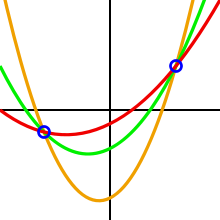

*Source: Wikipedia*



## **2.   Formulation mathématique**


###   *Fabrication des clés partielles (shares)*

Le partage du secret de Shamir consiste à encoder l'information que l'on souhaite partager en nombre. Ce nombre sera l'ordonnée à l'origine de notre polynôme $a_0$. $k-1$ nombres sont ensuite choisis aléatoirement: $\{a_i\}_{i \in [[1;k-1]]}$.

Le polynôme ainsi défini est:   
    $P(x) = \sum\limits_{i=0}^k (a_ix^i)$

En choisant $n$ points appartenant au polynôme $\{(xj,yi)\}_{j∈[[1;n]]}$ on obtient $n$ clés partielles. 

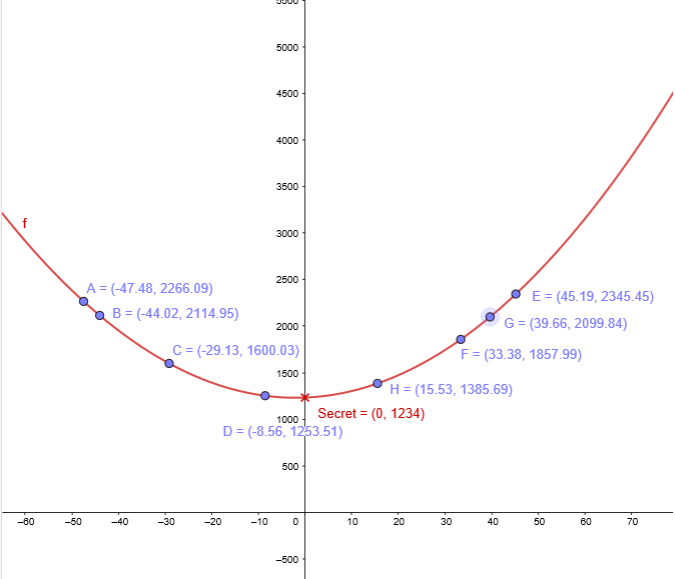

Tout ensemble de k points permet de remonter au polynôme et donc au secret.

Il est possible que tous les participants n'aient pas le même niveau d'accès. 
Par exemple, pour un partage avec un polynôme de degré 2:

  - une personne pourra avoir une clé qui contient 3 points et accéder seule au secret

  - 3 personnes peuvent avoir des clés qui contiennent un seul point chacune et doivent combiner leurs connaissances pour accéder au secret.

In [11]:
!python src/make_shares.py --holders alice=3 bob=1 charlie=1 --secret 987654321 --minimum_shares 2 --name secret

usage: a parser to give names and priorities [-h]
                                             [--holders [KEY=VAL [KEY=VAL ...]]]
                                             [--secret SECRET] [--name NAME]
                                             [--minimum_shares MINIMUM_SHARES]

optional arguments:
  -h, --help            show this help message and exit
  --holders [KEY=VAL [KEY=VAL ...]], -H [KEY=VAL [KEY=VAL ...]]
                        to register names and priorities.
  --secret SECRET, -s SECRET
                        the secret to be shared (int) (default: 123456789)
  --name NAME, -n NAME  the name of the secret (str) (default: 'secret')
  --minimum_shares MINIMUM_SHARES, -m MINIMUM_SHARES
                        the number of keys required to crack the secret (int)
                        (default: 3)



### *Reconstruction du secret* 





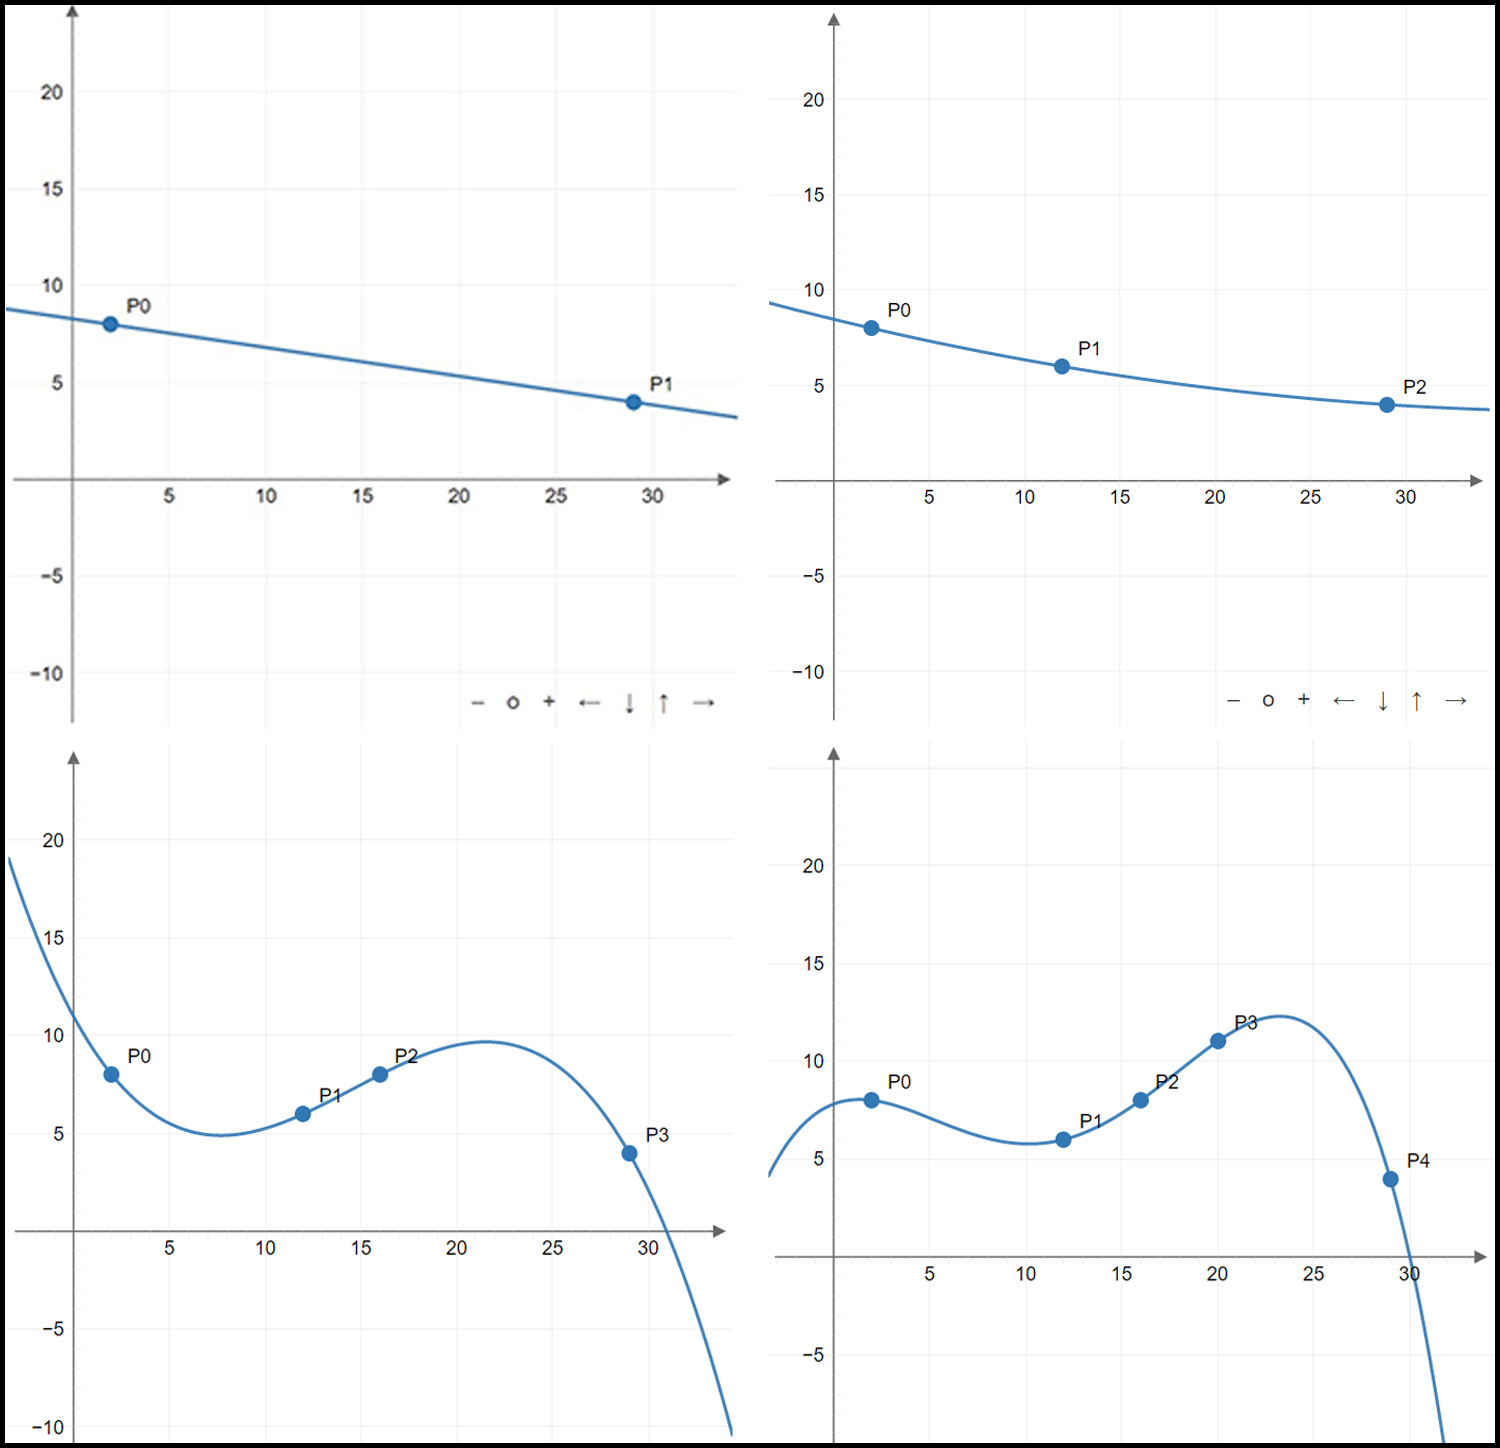

*Source: https://fr.acervolima.com*

Une interpolation polynomiale permet de remonter au polynôme à partir des points connus et donc à l'ordronnée à l'origine qui contient le secret.

Pour se faire, on peut utiliser la base de polynôme de Lagrange associée aux couples de coordonnées connues:
$\forall (i,j) \in [[1;k]]: l_i(X) = \prod\limits_{j \ne i} \frac{X-x_j}{x_i-x_j}$

Cet ensemble de polynôme constitue une base de l'espace des polynômes de degrés $k-1$.

On a alors :

$P(X) = \sum\limits_{i_=1}^k (y_il_i(X))$

Pour minimiser le nombre de calcul à réaliser, on peut directement calculer l'ordonnée à l'origine du polynôme avec la formule:

$P(0) = \sum\limits_{j_=1}^k y_j \prod\limits_{i \ne j} \frac{x_i}{x_i -x_j}$

In [10]:
!python src/open_vault.py --present alice --name secret

usage: a parser to give names and priorities [-h]
                                             [--present PRESENT [PRESENT ...]]
                                             [--name NAME]

optional arguments:
  -h, --help            show this help message and exit
  --present PRESENT [PRESENT ...], -p PRESENT [PRESENT ...]
                        a list of names to reveal the code.
  --name NAME, -n NAME  the name of the secret (str) (default: 'secret')


In [12]:
!python src/open_vault.py --present alice charlie --name secret

usage: a parser to give names and priorities [-h]
                                             [--present PRESENT [PRESENT ...]]
                                             [--name NAME]

optional arguments:
  -h, --help            show this help message and exit
  --present PRESENT [PRESENT ...], -p PRESENT [PRESENT ...]
                        a list of names to reveal the code.
  --name NAME, -n NAME  the name of the secret (str) (default: 'secret')


In [13]:
!python src/open_vault.py --present bob charlie --name secret

usage: a parser to give names and priorities [-h]
                                             [--present PRESENT [PRESENT ...]]
                                             [--name NAME]

optional arguments:
  -h, --help            show this help message and exit
  --present PRESENT [PRESENT ...], -p PRESENT [PRESENT ...]
                        a list of names to reveal the code.
  --name NAME, -n NAME  the name of the secret (str) (default: 'secret')


## **2.   Limites et solutions possibles**

**Problème:**  *A chaque clé obtenue, on obtient un peu d'information. 
Avec une certaine approche, on pourra considérablement réduire le nombre de solutions possibles avant d'avoir atteint le seuil.*

Si on connait un certaine nombre de points et le degré du polynôme recherché, on peut réduire le champ des valeurs possibles pour l'ordonnée à l'origine car on sait que la courbe est lisse dans le corps des réels.

### *Solutions*

Utiliser un corps arithmétique fini.





On choisit $p$, premier tel que $p>s$ et $p>n$. 
L'ensemble du polynôme s'exprime maintenant modulo $p$.
Les coordonnées donnaient en clé sont $(x,P(x)\, mod \, p)$ et non plus $(x,P(x))$.

Le nombre premier choisi peut être public. 

Le graphe d'un polynôme a alors l'allure suivante:

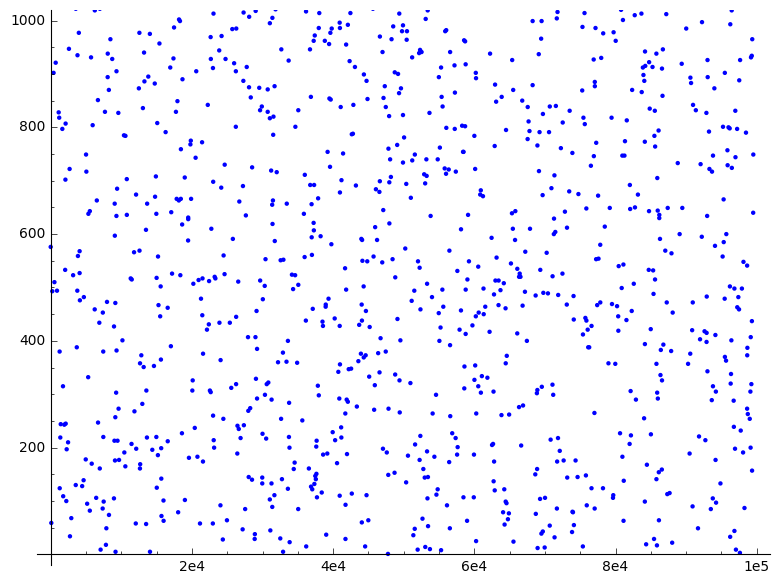

*Source: Wikipedia*

Le degré du polynôme ne constitue plus une source d'information sur l'allure de la courbe du polynôme.

Maintenant, avant d'atteindre le seuil nécessaire, il n'est plus possible d'obtenir de se rapprocher du secret sans avoir le nombre de clé requis.

In [ ]:
!python src/make_shares.py --holders alice=1 bob=1 charlie=1 daniel=1 emile=2 -s 987654321 -m 2

In [ ]:
!python src/open_vault.py -p alice bob charlie 

In [ ]:
!python src/open_vault.py -p alice emile

## **Pour aller plus loin ...**


